In [4]:
from IPython.display import display
from bs4 import BeautifulSoup
import requests
import io
import PIL.Image
from urllib.request import urlopen
from PIL import *
import instagram_explore as ie
from simple_colors import *

In [7]:
def Insta_dp_scrapper(un):
    res = requests.get('https://www.instagram.com/'+ un +'/')
    s_data = BeautifulSoup(res.text, 'html.parser')

    insta_dp = s_data.find('meta' ,property="og:image")
    dp_url = insta_dp.attrs['content']

    u = urlopen(dp_url)
    raw_data = u.read()


    image = PIL.Image.open(io.BytesIO(raw_data))
    #image.show()

    newsize = (250, 250) 
    im1 = image.resize(newsize)
    display(image)   # Use newsize if you want
    
    res = ie.user(un)

    data, cursor = ie.user(un, res.cursor)

    images = ie.user_images(un).data
    
    print(blue("Full name:",'bold'),data['full_name'])
    
    print(blue("Biography:",'bold'),'\n',data['biography'])
    
    print(blue("Followers:",'bold'),data['edge_followed_by']['count'])
    
    print(blue("Following:",'bold'),data['edge_follow']['count'])
    
    print(blue("Posts:",'bold'),data['edge_owner_to_timeline_media']['count'])
    
    if data['is_private'] == True:
        print(blue("Private Account",'bold'))
    else:
        print(blue("Public Account",'bold'))

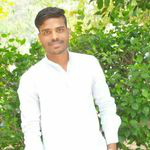

Full name: Vivek Jadhav
Biography: 
 
Followers: 247
Following: 188
Posts: 5
Private Account


In [8]:
Insta_dp_scrapper('vivekjadhav_vj')